In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\angelo avila - insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
df1 = df.iloc[:, 15:32]

In [10]:
print(df1.columns)

Index(['collision_type', 'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   collision_type               1000 non-null   object
 1   incident_severity            1000 non-null   object
 2   authorities_contacted        1000 non-null   object
 3   incident_hour_of_the_day     1000 non-null   int64 
 4   number_of_vehicles_involved  1000 non-null   int64 
 5   property_damage              1000 non-null   object
 6   bodily_injuries              1000 non-null   int64 
 7   witnesses                    1000 non-null   int64 
 8   police_report_available      1000 non-null   object
 9   total_claim_amount           1000 non-null   int64 
 10  injury_claim                 1000 non-null   int64 
 11  property_claim               1000 non-null   int64 
 12  vehicle_claim                1000 non-null   int64 
 13  auto_make                    1000 

In [4]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [5]:
to_drop = ['auto_make','auto_model']
df1.drop(to_drop,axis=1,inplace= True)

In [6]:
cat_cols = ['fraud_reported','police_report_available','property_damage','authorities_contacted','incident_severity','collision_type']
df_cat = pd.get_dummies(df1,columns = cat_cols)

In [7]:
df_cat.columns

Index(['incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported_N',
       'fraud_reported_Y', 'police_report_available_?',
       'police_report_available_NO', 'police_report_available_YES',
       'property_damage_?', 'property_damage_NO', 'property_damage_YES',
       'authorities_contacted_Ambulance', 'authorities_contacted_Fire',
       'authorities_contacted_None', 'authorities_contacted_Other',
       'authorities_contacted_Police', 'incident_severity_Major Damage',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage', 'collision_type_?',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision'],
      dtype='object')

In [8]:
to_drop = ['fraud_reported_N', 'police_report_available_NO', 'property_damage_NO', 'collision_type_?','property_damage_?','police_report_available_?','authorities_contacted_None']
df_cat.drop(to_drop, axis = 1, inplace = True)

In [9]:
df1.isnull().sum()

collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
fraud_reported                 0
dtype: int64

In [15]:
x.corr()

,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,police_report_available_YES,...,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision
incident_hour_of_the_day,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.040558,...,0.101444,0.039906,-0.040533,0.053208,-0.060789,0.121067,-0.171478,0.049406,0.049999,0.119857
number_of_vehicles_involved,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,-0.007291,...,0.079978,0.078553,-0.056125,0.130563,-0.067775,0.107338,-0.259094,0.031343,0.136085,0.159120
bodily_injuries,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527,0.011860,...,0.011090,0.001788,0.043830,0.025129,-0.005531,-0.023801,0.007332,0.016905,0.003585,-0.013078
witnesses,0.006527,-0.014669,-0.005606,1.000000,-0.011114,-0.024843,0.052640,-0.022564,0.045791,0.048653,...,0.007351,0.010334,-0.016244,0.045491,-0.051579,-0.002727,0.019410,0.052329,-0.032084,-0.024997
total_claim_amount,0.217702,0.274278,0.047093,-0.011114,1.000000,0.805025,0.810686,0.982773,-0.035781,0.036085,...,0.197725,0.227188,-0.157398,0.264517,-0.115556,0.220233,-0.565612,0.263056,0.217645,0.236866
injury_claim,0.165768,0.224650,0.047319,-0.024843,0.805025,1.000000,0.563866,0.722878,-0.013718,0.028211,...,0.172750,0.170841,-0.134488,0.184809,-0.061206,0.157791,-0.433959,0.202449,0.188119,0.156452
property_claim,0.179536,0.219084,0.039749,0.052640,0.810686,0.563866,1.000000,0.732090,-0.014508,0.012423,...,0.111694,0.184193,-0.108758,0.233455,-0.104744,0.157283,-0.436396,0.200558,0.161668,0.189042
vehicle_claim,0.215626,0.269393,0.043449,-0.022564,0.982773,0.722878,0.732090,1.000000,-0.042768,0.039979,...,0.203226,0.226385,-0.157489,0.262373,-0.118962,0.226910,-0.567048,0.264177,0.214334,0.242394
auto_year,0.021368,0.034554,-0.020527,0.045791,-0.035781,-0.013718,-0.014508,-0.042768,1.000000,-0.022339,...,-0.046334,0.004009,0.072761,0.014351,0.003317,-0.008830,-0.014104,-0.007321,-0.008441,-0.009088
police_report_available_YES,0.040558,-0.007291,0.011860,0.048653,0.036085,0.028211,0.012423,0.039979,-0.022339,1.000000,...,-0.005290,0.036919,0.015695,-0.032121,0.026331,0.033975,-0.047131,-0.033441,0.015695,0.045000


In [20]:
df1.dtypes

collision_type                 object
incident_severity              object
authorities_contacted          object
incident_hour_of_the_day        int64
number_of_vehicles_involved     int64
property_damage                object
bodily_injuries                 int64
witnesses                       int64
police_report_available        object
total_claim_amount              int64
injury_claim                    int64
property_claim                  int64
vehicle_claim                   int64
auto_make                      object
auto_model                     object
auto_year                       int64
fraud_reported                 object
dtype: object

In [11]:
df_cat

,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported_Y,...,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision
0,5,1,1,2,71610,6510,13020,52080,2004,1,...,0,0,1,1,0,0,0,0,0,1
1,8,1,0,0,5070,780,780,3510,2007,1,...,0,0,1,0,1,0,0,0,0,0
2,7,3,2,3,34650,7700,3850,23100,2007,0,...,0,0,1,0,1,0,0,0,1,0
3,5,1,1,2,63400,6340,6340,50720,2014,1,...,0,0,1,1,0,0,0,1,0,0
4,20,1,0,1,6500,1300,650,4550,2009,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,1,0,1,87200,17440,8720,61040,2006,0,...,1,0,0,0,1,0,0,1,0,0
996,23,1,2,3,108480,18080,18080,72320,2015,0,...,1,0,0,1,0,0,0,0,1,0
997,4,3,2,3,67500,7500,7500,52500,1996,0,...,0,0,1,0,1,0,0,0,0,1
998,2,1,0,1,46980,5220,5220,36540,1998,0,...,0,1,0,1,0,0,0,0,1,0


In [16]:
x = df_cat.drop(['fraud_reported_Y'],axis=1)
y = df_cat['fraud_reported_Y']

In [18]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In [17]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [18]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit and Transform to the Train Set

In [19]:
x_train_scaled = scaler.fit_transform(x_train)

#Transform the Test Set
x_test_scaled = scaler.transform(x_test)

In [20]:
#Define the Model
classifier = KNeighborsClassifier(n_neighbors=11, p=2 ,metric='euclidean')

classifier.fit(x_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=1, n_neighbors=11, p=2
                    , weights ='uniform')

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=11)

In [21]:
import math
math.sqrt(len(y_test))

15.811388300841896

In [22]:
y_pred = classifier.predict(x_test)
y_pred

C:\Users\Avila\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [23]:
print(accuracy_score(y_test, y_pred)*100)

80.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics

In [25]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[198   5]
 [ 45   2]]


In [28]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(metric='euclidean', n_neighbors=11):
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       203
           1       0.29      0.04      0.07        47

    accuracy                           0.80       250
   macro avg       0.55      0.51      0.48       250
weighted avg       0.72      0.80      0.73       250




Text(0.5, 47.7222222222222, 'Predicted label')

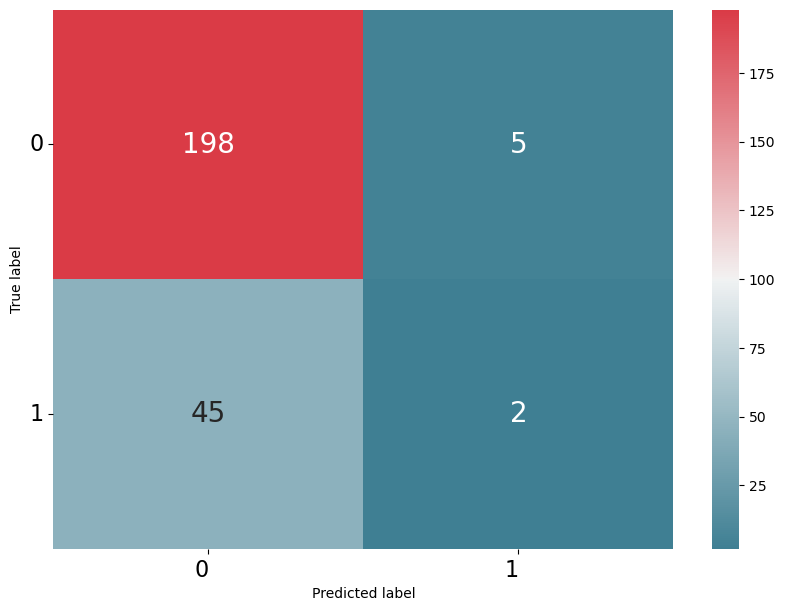

In [27]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

#Plot attributes
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Seaborn Heatmap
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d", cmap=cmap)

#Heatmap attributes
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')